In [1]:
import numpy as np
import pylab as pl
import warnings
import sklearn

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [2]:
# Диагональная, ортогональная, не единичная

A = np.array([[-1,0,0],[0,-1,0],[0,0,-1]])
AT = A.transpose()
print(AT)
A.dot(AT)

[[-1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]


array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [3]:
# Верхнетреугольная, ортогональная и нижнеугольная ортогональная - не придумал, из системы уравнений для такой матрицы решения не нашел

In [4]:
# Определитель равен 1

C = np.array([[1,1],[1,2]])
np.linalg.det(C)

1.0

In [5]:
# Собственные значения и собственные вектора матрицы

m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [6]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение", str(w[i]))
    print("Собственный вектор для собственного значения",str(w[i]), str(v[:,i]))


Собственное значение 1.0
Собственный вектор для собственного значения 1.0 [-0.89442719  0.4472136 ]
Собственное значение 4.0
Собственный вектор для собственного значения 4.0 [-0.70710678 -0.70710678]


## Уровень 1

#### Спектральное разложение матрицы

In [7]:

m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [8]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [9]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


#### Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA.

(1797, 64)


<Figure size 432x288 with 0 Axes>

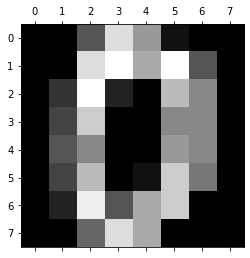

In [10]:
## Загружаем данные по рукописной цифре

digits = load_digits()
print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [11]:
A = digits.data
A

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
# Применяем к данным разложение PCA

pca = PCA(n_components=62)
pca.fit(A)

PCA(n_components=62)

In [13]:
C = pca.transform(A)
print(C.shape)

(1797, 62)


In [14]:
D = pca.inverse_transform(C)
print(D.shape)

(1797, 64)


In [15]:
# Ищем среднеквадратическое отклонение

sklearn.metrics.mean_squared_error(A,D)

3.269255357233208e-29

In [16]:
# Как пример делаем разложение на 58 компонентах PCA

pca58 = PCA(n_components=58)
pca58.fit(A)
E = pca58.transform(A)
F = pca58.inverse_transform(E)

sklearn.metrics.mean_squared_error(A,F)

3.670683290814935e-05

In [17]:
# Прописываем цикл и смотрим как меняется среднеквадратическое отклонение в зависимости от количества компонент PCA

a = list()
for i in range(1,63):
    pca = PCA(n_components=i)
    pca.fit(A)
    C = pca.transform(A)
    D = pca.inverse_transform(C)
    print(i, sklearn.metrics.mean_squared_error(A,D))
    a.append(sklearn.metrics.mean_squared_error(A,D))

1 15.977678462234529
2 13.421012200761464
3 11.206800697129394
4 9.627986407129443
5 8.542447615203336
6 7.619390865132192
7 6.809148516968291
8 6.121796587416844
9 5.492288541843317
10 4.9142994482917
11 4.468938706244961
12 4.042319131667764
13 3.7002837879188015
14 3.367257567420372
15 3.091922964014908
16 2.8272124987097382
17 2.579818896847909
18 2.3453605613049673
19 2.154463210579682
20 1.9843542604219042
21 1.8172952996440115
22 1.667667103529549
23 1.5235629864795617
24 1.3879031624055664
25 1.2572069986443037
26 1.1453229007402896
27 1.0372463914831997
28 0.9405503124938559
29 0.8486216852934705
30 0.7681432576929974
31 0.6980131831964889
32 0.6316628117111458
33 0.5684357047919384
34 0.506852970372549
35 0.44896990566639816
36 0.3938174353190021
37 0.34564640477592135
38 0.3028924172250831
39 0.26116338084672486
40 0.22147132289588
41 0.18581949479365767
42 0.15603541761847037
43 0.12765800399303592
44 0.10126700469810138
45 0.07937337936466574
46 0.05919369521897202
47 0.04

In [18]:
print(a)

[15.977678462234529, 13.421012200761464, 11.206800697129394, 9.627986407129443, 8.542447615203336, 7.619390865132192, 6.809148516968291, 6.121796587416844, 5.492288541843317, 4.9142994482917, 4.468938706244961, 4.042319131667764, 3.7002837879188015, 3.367257567420372, 3.091922964014908, 2.8272124987097382, 2.579818896847909, 2.3453605613049673, 2.154463210579682, 1.9843542604219042, 1.8172952996440115, 1.667667103529549, 1.5235629864795617, 1.3879031624055664, 1.2572069986443037, 1.1453229007402896, 1.0372463914831997, 0.9405503124938559, 0.8486216852934705, 0.7681432576929974, 0.6980131831964889, 0.6316628117111458, 0.5684357047919384, 0.506852970372549, 0.44896990566639816, 0.3938174353190021, 0.34564640477592135, 0.3028924172250831, 0.26116338084672486, 0.22147132289588, 0.18581949479365767, 0.15603541761847037, 0.12765800399303592, 0.10126700469810138, 0.07937337936466574, 0.05919369521897202, 0.04109542554333101, 0.0265532099177732, 0.016092618775246082, 0.00850207611310813, 0.004

In [19]:
# Вывод: видим, что восстановление данных начинает значительно терять качество при приближении компонент CPA к 1